In [4]:
pip install tflearn 

     |████████████████████████████████| 112kB 7.5MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp37-none-any.whl size=127301 sha256=605d74f33b96e33cb13e5974a920fc2c4b56e620ef7739032f4d926d8f6b4c93
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn


In [64]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from PIL import Image
from PIL import ImageMath

2.4.1


In [65]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

np.seterr(over='ignore')
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

In [66]:
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression

# Data loading and preprocessing
import tflearn.datasets.oxflower17 as oxflower17
X, Y = oxflower17.load_data(one_hot=True)

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [67]:
import numpy as np
new=[]
class_label=[]
find_class=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
for i in range(0,len(Y)):
  new.append(np.multiply(find_class,Y[i]))
  total = np.sum(new[i])
  class_label.append(total)

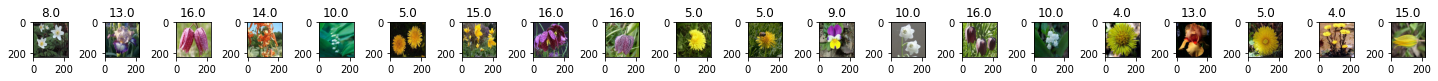

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_img(show,img,label):
    fig, axs = plt.subplots(1, show, figsize=(20, 20))
    fig.tight_layout()
    for i in range(0, show):
      axs[i].imshow(img[i], label=label[i])
      axs[i].set_title(label[i])
show_img(20, X, class_label)

In [69]:
from sklearn.utils import shuffle
X,y= shuffle(np.array(X),np.array(class_label), random_state=1)

**Apply different filters**

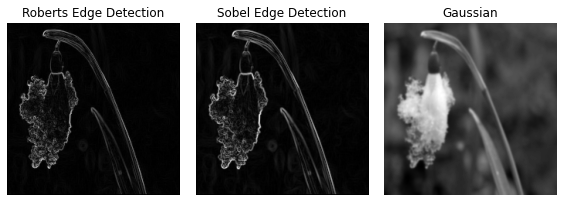

In [97]:

from skimage import filters
from skimage.data import camera
from skimage.util import compare_images
from skimage.color import rgb2gray
img_gray = rgb2gray(X[0])


image = camera()
edge_roberts = filters.roberts(img_gray)
edge_sobel = filters.sobel(img_gray)
gaussian=filters.gaussian(img_gray)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

axes[2].imshow(gaussian, cmap=plt.cm.gray)
axes[2].set_title('Gaussian')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

**Supervised Approach**

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1020, 224, 224, 3), (340, 224, 224, 3), (1020,), (340,))

In [16]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
# Changing dimensions to N x D X C = 128x128x3
# Number of samples you want in training data. 3562 is max.
N = 1020
x_tr = []
for i in range(N):
    x_tr.append(X_train[i,:].flatten())


In [11]:
class KNN:
    def __init__(self):
        pass
    
    # Memorize the training data    
    def train(self, X, y):
        # X is 2D if size N x D = 28x28, so each row is an example
        # y is 1D of size N
        self.tr_x = X
        self.tr_y = y
        
    # For the test image:
    #  find nearest train image with minimum distance from the test image
    #  predict the label of nearest training image
    def predict(self, x):
        # x is of size D = 128x128x3 for which we want to predict the label
        # returns the predicted label for the input x
        min_idx = None
        min_dist = 100000000
        for test_sample in range(len(self.tr_x)):
            dist = 0
            for each_value in range(len(self.tr_x[0])):
                dist += abs(float((self.tr_x[test_sample][each_value] - x[each_value])))
            if dist < min_dist:
                min_dist = dist
                min_idx = test_sample
        return self.tr_y[min_idx]   

In [12]:
classifier = KNN()
classifier.train(x_tr, y_train)

In [13]:
x_te =[]
for i in range(len(X_test)):
  x_te.append(X_test[i,:].flatten())

In [14]:
y_predict=[]
for i in range (0,3):#range (0,len(x_te)):
  y_predict.append(classifier.predict(x_te[i]))

In [20]:
y_test[0:3],y_predict

(array([ 2.,  1., 16.]), [10.0, 5.0, 16.0])

 **DNN**

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1020, 224, 224, 3), (340, 224, 224, 3), (1020,), (340,))

In [71]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [72]:
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
num_classes = y_test.shape[1] 
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 18


In [73]:
# Changing dimensions to N x D X C = 128x128x3
# Number of samples you want in training data. 3562 is max.
N = 1020
x_tr = []
for i in range(N):
    x_tr.append(X_train[i,:].flatten())
x_te = []
for i in range(340):
    x_te.append(X_test[i,:].flatten())

In [74]:
len(x_tr),len(x_te),len(x_tr[0]),len(x_te[0])

(1020, 340, 150528, 150528)

In [75]:
# no.of classes
num_classes = y_test.shape[1]
# define model

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def nn_model():
    # create model
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(1020, activation='relu', input_shape=(1020,))) ###Multiple Dense units with Relu activation
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [76]:
# build the model
model = nn_model()

In [77]:
# Compile model
sgd = optimizers.Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 

In [78]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)

Train on 1020 samples, validate on 340 samples
Epoch 1/100
1020/1020 - 14s - loss: 2.8863 - acc: 0.0500 - val_loss: 2.8505 - val_acc: 0.0912
Epoch 2/100
1020/1020 - 10s - loss: 2.8439 - acc: 0.0745 - val_loss: 2.7975 - val_acc: 0.0824
Epoch 3/100
1020/1020 - 10s - loss: 2.7602 - acc: 0.1059 - val_loss: 2.7375 - val_acc: 0.1206
Epoch 4/100
1020/1020 - 10s - loss: 2.6870 - acc: 0.1265 - val_loss: 2.6823 - val_acc: 0.1147
Epoch 5/100
1020/1020 - 10s - loss: 2.6181 - acc: 0.1706 - val_loss: 2.6235 - val_acc: 0.1441
Epoch 6/100
1020/1020 - 10s - loss: 2.5411 - acc: 0.1951 - val_loss: 2.5515 - val_acc: 0.1824
Epoch 7/100
1020/1020 - 10s - loss: 2.4725 - acc: 0.2265 - val_loss: 2.5372 - val_acc: 0.2059
Epoch 8/100
1020/1020 - 10s - loss: 2.3993 - acc: 0.2520 - val_loss: 2.4692 - val_acc: 0.1706
Epoch 9/100
1020/1020 - 10s - loss: 2.3145 - acc: 0.2431 - val_loss: 2.4052 - val_acc: 0.2235
Epoch 10/100
1020/1020 - 10s - loss: 2.2115 - acc: 0.3039 - val_loss: 2.3447 - val_acc: 0.2412
Epoch 11/100

In [79]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

print("Error: %.2f%%" % (100-scores[1]*100))

model.summary()

Error: 54.41%
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  153539580 
_________________________________________________________________
dense_2 (Dense)              multiple                  261376    
_________________________________________________________________
dense_3 (Dense)              multiple                  16448     
_________________________________________________________________
dense_4 (Dense)              multiple                  2080      
_________________________________________________________________
dense_5 (Dense)              multiple                  594       
Total params: 153,820,078
Trainable params: 153,820,078
Non-trainable params: 0
__________________________

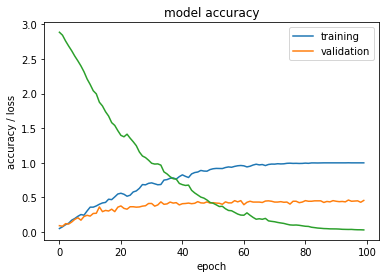

In [80]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

CNN

In [98]:
from sklearn.model_selection import train_test_split
X_train_cnn,X_test_cnn,y_train_cnn,y_test_cnn=train_test_split(X,y,random_state=1)
X_train_cnn.shape,X_test_cnn.shape,y_train_cnn.shape,y_test_cnn.shape

((1020, 224, 224, 3), (340, 224, 224, 3), (1020,), (340,))

In [99]:
# normalize inputs from 0-255 to 0-1
X_train = X_train_cnn / 255.0
X_test = X_test_cnn / 255.0

In [100]:
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train_cnn = to_categorical(y_train_cnn)
y_test_cnn = to_categorical(y_test_cnn)

# no.of classes
num_classes = y_test_cnn.shape[1] 
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 18


In [12]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential


nb_epochs= 50
rows, cols=224, 224
n_channels=3
n_pool=2
n_conv=3
n_classes=18
n_filters=64
def CNN_model():
  cnn_model = Sequential()
  cnn_model.add(Conv2D(n_filters, (n_conv,n_conv), activation="relu", input_shape=(rows, cols, n_channels)))
  cnn_model.add(layers.MaxPooling2D(n_pool,n_pool))
  cnn_model.add(Conv2D(n_filters, (n_conv,n_conv), activation="relu"))
  cnn_model.add(Flatten())
  cnn_model.add(Dense(n_classes, activation="softmax"))
  return cnn_model

In [13]:
cnn=CNN_model()
sgd=optimizers.Adam(lr=1e-3)

# Compile the model
cnn.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=sgd)

In [14]:
X_train.shape,y_train_cnn.shape,X_test.shape,y_test_cnn.shape

((1020, 224, 224, 3), (1020, 18), (340, 224, 224, 3), (340, 18))

In [15]:
# Fit the model
history=cnn.fit( x=X_train, y=y_train_cnn, batch_size=32, epochs=nb_epochs, validation_data = (X_test,y_test_cnn), verbose=2)

Train on 1020 samples, validate on 340 samples
Epoch 1/50
1020/1020 - 94s - loss: 2.9046 - acc: 0.0559 - val_loss: 2.8688 - val_acc: 0.0529
Epoch 2/50
1020/1020 - 93s - loss: 2.8609 - acc: 0.0529 - val_loss: 2.8527 - val_acc: 0.0441
Epoch 3/50
1020/1020 - 93s - loss: 2.8470 - acc: 0.0549 - val_loss: 2.8500 - val_acc: 0.0529
Epoch 4/50
1020/1020 - 93s - loss: 2.8420 - acc: 0.0578 - val_loss: 2.8498 - val_acc: 0.0382
Epoch 5/50
1020/1020 - 93s - loss: 2.8387 - acc: 0.0520 - val_loss: 2.8472 - val_acc: 0.0382
Epoch 6/50
1020/1020 - 93s - loss: 2.8339 - acc: 0.0765 - val_loss: 2.8418 - val_acc: 0.0529
Epoch 7/50
1020/1020 - 93s - loss: 2.8127 - acc: 0.0902 - val_loss: 2.7989 - val_acc: 0.1176
Epoch 8/50
1020/1020 - 93s - loss: 2.7334 - acc: 0.1294 - val_loss: 2.6899 - val_acc: 0.1353
Epoch 9/50
1020/1020 - 93s - loss: 2.5559 - acc: 0.1824 - val_loss: 2.5756 - val_acc: 0.1853
Epoch 10/50
1020/1020 - 93s - loss: 2.3861 - acc: 0.2618 - val_loss: 2.4947 - val_acc: 0.2176
Epoch 11/50
1020/1020 

In [17]:

# Final evaluation of the model
scores = cnn.evaluate(X_test, y_test_cnn, verbose=0)

print("Error: %.2f%%" % (100-scores[1]*100))

cnn.summary()

Error: 96.18%
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
flatten (Flatten)            (None, 760384)            0         
_________________________________________________________________
dense (Dense)                (None, 18)                13686930  
Total params: 13,725,650
Trainable params: 13,725,650
Non-trainable params: 0
_________________________________________________________________


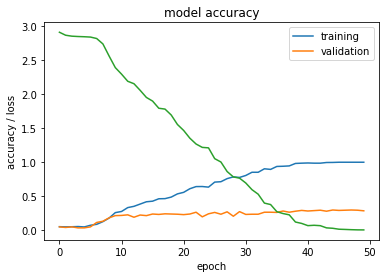

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [41]:
y_predict=cnn.predict_classes(X_test)

In [33]:
y_test_cnn.shape,y_predict.shape

((340,), (340,))

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_cnn,y_predict)[:1]

array([[6, 0, 1, 2, 1, 2, 4, 0, 0, 0, 1, 0, 0, 1, 3, 1, 0]])

In [50]:
# serialize model to JSON
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [51]:
from keras.models import model_from_json 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Loaded model from disk


In [52]:
loaded_model.predict_classes(X_test)

array([ 4,  4,  4,  4,  7, 11, 17, 12,  4,  5, 13,  2,  6,  7,  7, 17,  7,
       13,  7, 15,  3, 11, 10, 15, 14,  8,  1, 11, 12, 10, 10,  6,  4,  3,
        4, 13,  3,  8, 10, 10, 16, 11, 15,  3,  6,  9, 15, 10,  7,  7, 14,
        1,  5, 16,  2,  5, 12,  9, 16, 13, 17,  8,  3,  7,  7, 14,  5,  4,
        2,  7,  5, 15, 10, 14,  4, 13, 16, 16, 14,  9,  2,  6,  7,  7,  4,
        3, 11,  8,  6,  3, 16,  7, 13,  7,  3,  9, 13, 16,  3,  7,  4, 16,
        5,  3, 14,  6, 10, 12,  7,  1,  7,  7, 17,  7,  7, 11, 17, 17, 10,
       17, 15, 14,  4,  1,  7,  3,  1,  7, 16, 15, 16,  4, 15, 10,  5, 10,
        7,  7, 11,  5,  9, 17, 14, 13,  4, 13, 13, 14, 11, 17,  2,  2,  4,
        4,  1,  7, 12, 11,  5,  8, 12,  5, 15,  1, 13,  7,  3,  4,  7,  7,
        4,  6,  1, 14, 10,  3,  3, 10,  4, 13,  5,  9, 11,  7,  4,  2, 11,
        7, 17, 14, 14,  9, 12,  6, 16, 12,  1, 14, 17, 14,  4, 14,  7,  7,
        3,  3, 10,  2,  1,  3, 10, 15, 10, 10, 15,  6,  3,  1, 16,  1, 10,
        7, 10,  9, 17, 14

Create a GUI to import the image “Prediction.jpg” and use the above designed AIML image classification model to
predict the class/label of this image.

In [ ]:
import tkinter as tk
from tkinter import ttk
from tkinter import *
import cv2 
from keras.models import model_from_json
import re
import os
#export DISPLAY=:1

win=tk.Tk()
win.title("Classifier GUI")

#Import Dataframe Name
Name=ttk.Label(win,text="File Name with full path")
Name.grid(row=0,column=0,sticky=tk.W)
Name_var=tk.StringVar()
Name_entrybox=ttk.Entry(win,width=16,textvariable=Name_var)
Name_entrybox.grid(row=0,column=1)
img=[]
def Import_Data():
    global DB 
    DF_Name=Name_var.get()
    img = cv2.imread(DF_Name,-1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(128,128))
    print("Image loaded",img.shape)
# Blank empty window to print confirmation 
    confirm="Done"
    Confirm_entrybox=ttk. Entry(win, width=16) 
    Confirm_entrybox.grid (row=0, column=3) 
    Confirm_entrybox.insert (1,str(confirm)) 

Import_data_button=ttk.Button(win,text="Import Data",command=Import_Data)
Import_data_button.grid(row=0, column=2)

def predict(data): 
    load json and create model
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights("model.h5")
    result = loaded_model.predict(data)


        
Predict_button=ttk.Button(win,text="Predict",command=predict(img))
Predict_button.grid(row=2, column=2)



win.mainloop()

In [58]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [61]:
import os
path='/content/drive/MyDrive/'
os.chdir(path)
retval = os.getcwd()
print ("Current working directory %s" % retval)

Current working directory /content/drive/MyDrive


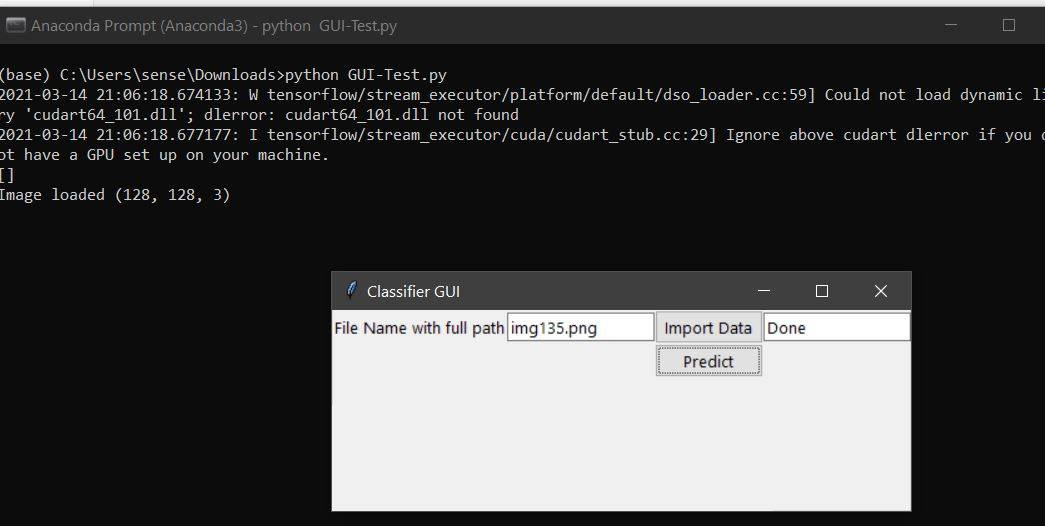

In [62]:
from IPython.display import Image, display
display(Image('GUI.JPG'))

**Explain in depth your strategy to maintain and support the AIML image classifier after it in production.**


Once the model is deployed in production, it can run into the problem of Model degradation or more commonly known as Model Drift. The standard practice should be consistent Model monitoring after production deployment.

Addition of unseen data or change in data interpretation may reduce the model capability of predicting with good accuracy.

One can chose to refit the model over periodic time or the other way would be instead of completely discardig the model, one can chose to update it with more recent data.

